In [11]:
from matplotlib import pyplot as plt
import numpy as np
import random

In [12]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


In [13]:
def plot_Points(X, y):
    plt.scatter(X, y)
    plt.xlabel('no. rooms')
    plt.ylabel('price')

In [14]:
def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

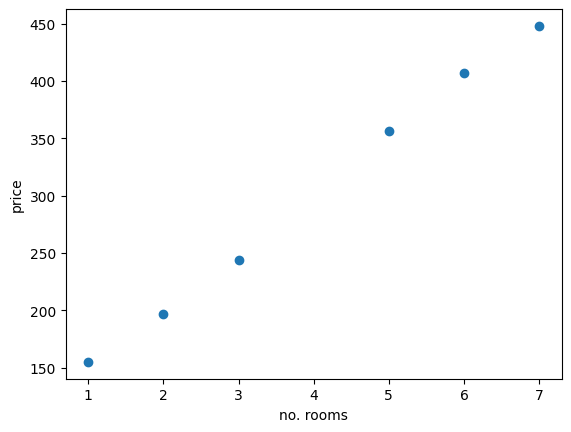

In [15]:
plot_Points(features, labels)

In [16]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    '''
    inputs:
        (price_per_room, base_price): size of (W, b) is (1, 1) respectevly, only takes one dimension W
        learning_rate:  small incremental on the rotation of the line, small (x10-5) to avoid overshooting, altough this wont overshoot as is a simple model with 1 W dim
        (num_rooms, price): (features, labes) respectevly of the random point choose in the lnear_regression func.
    
    transformation:
        price_per_room = 

    output:
        (W, b) modified at the specific point
    '''
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

In [17]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    '''
    inputs:
        (price_per_room, base_price): size of (W, b) is (1, 1) respectevly, only takes one dimension W
        learning_rate:  small incremental on the rotation of the line, small (x10-5) to avoid overshooting, altough this wont overshoot as is a simple model with 1 W dim
        (num_rooms, price): (features, labes) respectevly of the random point choose in the lnear_regression func.

    transformation:
        if the point is above the line:
            rotate counterclockwise and translate up
        else:
            rotate clockwise and translate down
    
    output:
        (W, b) modified at the specific point to be closer
    '''
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

1 155
Price per room: 51.04430678220095
Base price: 91.59448307644864


(np.float64(51.04430678220095), np.float64(91.59448307644864))

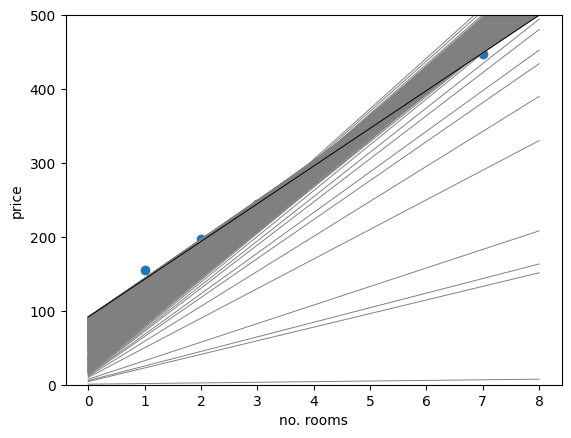

In [18]:
import random

random.seed(0)

def linear_regression(features, labels, learning_rate=0.0001, epochs = 1000):
    '''
    input:
        start(price_per_room, base_price): rand int (seed 0)
        idx i: choosen randomly between all posisble points in my train_set, modify the line according according to all points to minimize loss
        epochs: no. iterations

    output:
        (W, b) of the final model
    '''
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        draw_line(price_per_room, base_price)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        if epoch == 1:
            print(num_rooms, price)
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    plot_Points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

In [19]:
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

Price per room: 51.16780277820274
Base price: 99.42265402912152


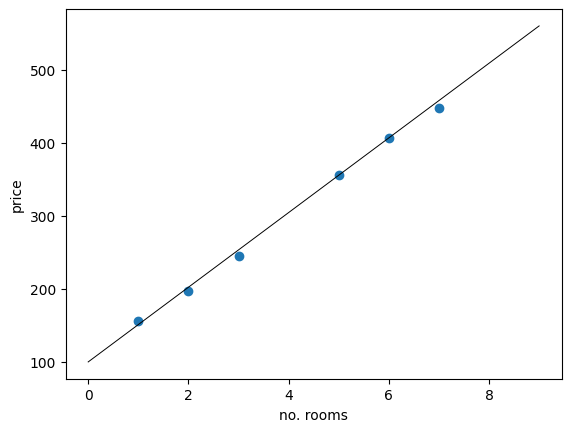

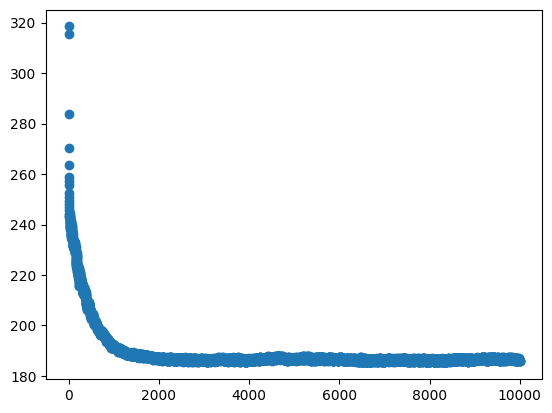

(np.float64(51.16780277820274), np.float64(99.42265402912152))

In [ ]:

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    plot_Points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)